### <font color=blue >Análise dos dados de acidentes aéreos em todo o mundo entre os anos 1919 e 2021</font>

O dataset foi retirado do Kaggle (www.kaggle.com/datasets/ramjasmaurya/aviation-accidents-history1919-april-2022).
Os dados tem origem no site www.aviation-safety.net.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

In [2]:
import plotly.express as px

In [3]:
df= pd.read_csv('aviation_accidents in countries - aviation_accidents.csv')
df

,Country,date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Australia,07-Dec-2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,19-Feb-1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,19-Feb-2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,11-May-1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,04-Jan-1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21694,Papua New Guinea,14-Aug-1975,BN-2A Islander,P2-ATX,Aerial Tours,NaN,Naoro Airpor...,A1
21695,USA,28-Jan-1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,07-Sep-1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,31-Aug-1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


*Renomeando as colunas, colocando a primeira letra em maiúsculo*

In [4]:
df = df.rename(columns={'date':'Date', 'Air-craft type':'Air_craft_type', 'registration name/mark':'Registration_name/mark'})
df = df.rename(columns={'operator':'Operator', 'fatilites':'Fatilites', 'location':'Location', 'category':'Category'})
df

,Country,Date,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Australia,07-Dec-2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,19-Feb-1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,19-Feb-2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,11-May-1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,04-Jan-1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21694,Papua New Guinea,14-Aug-1975,BN-2A Islander,P2-ATX,Aerial Tours,NaN,Naoro Airpor...,A1
21695,USA,28-Jan-1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,07-Sep-1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,31-Aug-1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


In [5]:
df.describe()

,Country,Date,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
count,21699,21631,21631,20235,21630,18620,21280,21631
unique,224,14203,3052,19806,5666,359,13371,11
top,USA,10-May-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,Havana-José ...,A1
freq,4285,93,1707,13,2088,9989,105,15801


In [6]:
df[df.Location == 'Havana-José ...'].head(50)

,Country,Date,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
80,Cuba,02-Aug-1970,Boeing 747-121,N736PA,Pan Am,0,Havana-José ...,H2
513,Cuba,17-Mar-1969,Boeing 727,NaN,Faucett Perú,0,Havana-José ...,H2
958,Cuba,19-May-1983,Boeing 727,NaN,Eastern Air Lines,0,Havana-José ...,H2
1042,Cuba,20-Sep-1968,Boeing 720,NaN,Eastern Air Lines,0,Havana-José ...,H2
1043,Cuba,11-Feb-1969,DC-9,NaN,LAV,0,Havana-José ...,H2
1479,Cuba,04-Nov-1968,Boeing 727,NaN,National Airlines,0,Havana-José ...,H2
1674,Cuba,07-Dec-1981,Boeing 727,NaN,AVENSA,0,Havana-José ...,H2
1816,Cuba,06-Nov-1980,DC-9,NaN,AVENSA,0,Havana-José ...,H2
1835,Cuba,03-Jan-1971,DC-8,NaN,National Airlines,0,Havana-José ...,H2
1901,Cuba,22-Jul-1982,Martin 4-0-4,NaN,Marco Island Airways,0,Havana-José ...,H2


In [7]:
df.Air_craft_type.value_counts()


Douglas C-47A (DC-3)     1707
Douglas C-47 (DC-3)       606
Douglas C-47B (DC-3)      529
Curtiss C-46A             449
Antonov An-2R             361
                         ... 
Airbus A310-300             1
KC-10A Extender             1
Douglas Dakota (DC-3)       1
Convair CV-440F SCD         1
Boeing 747-121 (SCD)        1
Name: Air_craft_type, Length: 3052, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699 entries, 0 to 21698
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 21699 non-null  object
 1   Date                    21631 non-null  object
 2   Air_craft_type          21631 non-null  object
 3   Registration_name/mark  20235 non-null  object
 4   Operator                21630 non-null  object
 5   Fatilites               18620 non-null  object
 6   Location                21280 non-null  object
 7   Category                21631 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [9]:
# Verificando quantos elementos nulos há na coluna 'date'
df.Date.isnull().sum()

68

*Criando a coluna 'Date', contendo só os anos dos acidentes. Observe que onde havia um elemento nulo, o mesmo foi substituido pelo número 1000*

In [10]:
lista = []
for i in df.index:
    a = str(df.Date[i])[-4:]
    if a.isnumeric() == True:
        a = int(a)
        lista.append(a)
    else:
        a = 1000
        lista.append(a)        
    
df['Year'] = lista[:]

*Realocando a nova coluna criada, substituindo a coluna 'date' antiga*

In [11]:
df = df[['Country', 'Year', 'Air_craft_type', 'Registration_name/mark',
       'Operator', 'Fatilites', 'Location', 'Category']]
df

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Australia,2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21694,Papua New Guinea,1975,BN-2A Islander,P2-ATX,Aerial Tours,NaN,Naoro Airpor...,A1
21695,USA,1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


In [12]:
df[df.Year == 1000].Year.count()

104

*Selecionando os índices em que a coluna 'Date' contém o elemento 1000 e retirando-os do dataframe*

In [13]:
lista = df[df.Year == 1000]['Year'].index
df = df.drop(lista)

In [14]:
#Verificando quantos elementos nulos há na coluna 'fatilites'
df[df.Fatilites.isnull() == True].shape

(2993, 8)

*Deletando os elementos nulos da coluna 'fatilites'*

In [15]:
df.dropna(subset='Fatilites', inplace=True)
df

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Australia,2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21693,USA,1983,BN-2A-8 Islander,N37MN,Munz Northern Airlines,2,"Selawik, AK",A1
21695,USA,1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


*Ordenando as linhas pela coluna Date*

In [16]:
df = df.sort_values('Year')

*Resetando o índice e deletando a coluna index criada no processo*

In [17]:
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Italy,1919,Caproni Ca.48,NaN,Caproni,14,Verona,A1
1,United Kingdom,1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,A1
2,Sweden,1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,Östanå,A1
3,South Africa,1920,Handley Page O/7,G-EANV,Handley Page Transport,0,Acadia Sidin...,A1
4,United Kingdom,1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,A1
...,...,...,...,...,...,...,...,...
18597,Switzerland,2022,Cessna 208 Caravan I,D-FLIC,"Skydive Costa d'Argento, lsf",1,Säntis Mountain,A1
18598,China,2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou-Xia...,A1
18599,Brazil,2022,Embraer Phenom 100,LV-GQN,Flyzar,0,Angra dos Re...,A2
18600,Iran,2022,Cessna 208B Grand Caravan EX,YV3033,Mahan Air,0,"near Vakilabad, A...",A2


In [18]:
df.shape

(18602, 8)

*Retirando os dados de 2022*

In [19]:
filtro = df.Year < 2022
df = df[filtro]
#df = df[df.Date == 2022].index.drop(axis=0)
df.shape

(18556, 8)

*Ordenando as linhas pela coluna 'fatilites' de forma decrescente*

In [20]:
df.sort_values('Fatilites', ascending=False)

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
7668,Peru,1970,Lockheed L-188A Electra,OB-R-939,LANSA,99+ 2,near Cuzco Airpor...,A1
10127,Russia,1981,Tupolev Tu-154B-2,CCCP-85480,"Aeroflot, Krasnoyarsk",99,Noril'sk Air...,A1
13063,Russia,1995,Tupolev Tu-154B,RA-85164,Khabarovsk United Air,98,near Grossevichi,A1
12064,Saudi Arabia,1991,Lockheed C-130H Hercules,469,Saudi AF,98,near Rash Mishab,A1
16167,Indonesia,2009,Lockheed L-100-30 Hercules,A-1325,Indonesian AF,97+ 2,near Madiun-Iswah...,A1
...,...,...,...,...,...,...,...,...
3713,Russia,1951,Antonov An-2,CCCP-N565,"GUSMP, Directorate of Polar Aviation",0,Tukalan rive...,A1
11108,Japan,1986,Airbus A300B4-601,HS-TAE,Thai Airways International,0,near Tosa Bay,C2
3707,United Kingdom,1951,Avro 689 Tudor 5,G-AKCC,private,0,Bovingdon RA...,A1
3701,USA,1951,Lockheed L-749 Constellation,N91202,TWA,0,Phoenix-Sky ...,A2


In [21]:
# Criando uma cópia do dataframe
df2 = df.copy()

*Somando os valores que estavam divididos na coluna 'fatilites'*

In [22]:
for i in df2.index:
    a = df2.Fatilites[i]
    if a.isnumeric() == False:
        a1 = a.split('+')
        a2 = int(a1[0]) + int(a1[1].strip())
        a2 = str(a2)
        df2.replace(a,a2, inplace=True)

df2

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Italy,1919,Caproni Ca.48,NaN,Caproni,14,Verona,A1
1,United Kingdom,1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,A1
2,Sweden,1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,Östanå,A1
3,South Africa,1920,Handley Page O/7,G-EANV,Handley Page Transport,0,Acadia Sidin...,A1
4,United Kingdom,1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,A1
...,...,...,...,...,...,...,...,...
18551,France,2021,Embraer Phenom 100,9H-FAM,Luxwing,0,Paris-Le Bou...,A1
18552,Nigeria,2021,Beech B300 King Air 350i,NAF203,Nigerian AF,11,near Kaduna Airpo...,A1
18553,USA,2021,Cessna 550 Citation II,N803SC,STB Aviation LLC,0,Charleston E...,A1
18554,Brazil,2021,IAI 1124A Westwind II,PR-BVB,Brasil Vida Táxi Aéreo,0,Goiânia-Sant...,A1


In [23]:
df2.to_csv('dados_acidentes.csv')

*Verificando o formato dos elementos na coluna 'fatilites'*

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18556 entries, 0 to 18555
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 18556 non-null  object
 1   Year                    18556 non-null  int64 
 2   Air_craft_type          18556 non-null  object
 3   Registration_name/mark  17335 non-null  object
 4   Operator                18555 non-null  object
 5   Fatilites               18556 non-null  object
 6   Location                18454 non-null  object
 7   Category                18556 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


*Convertendo os elementos da coluna 'fatilites' em elementos numéricos*

In [25]:
df2.Fatilites = pd.to_numeric(df2.Fatilites, errors='coerce')

In [26]:
df2.describe(include='all')

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
count,18556,18556.000000,18556,17335,18555,18556.000000,18454,18556
unique,156,NaN,2957,16952,5477,NaN,11899,11
top,USA,NaN,Douglas C-47A (DC-3),LZ-...,USAF,NaN,Havana-José ...,A1
freq,3876,NaN,1043,13,898,NaN,105,13355
mean,NaN,1977.813537,NaN,NaN,NaN,6.495258,NaN,NaN
std,NaN,24.475936,NaN,NaN,NaN,23.643543,NaN,NaN
min,NaN,1919.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,1956.000000,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,1977.000000,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,1999.000000,NaN,NaN,NaN,5.000000,NaN,NaN


In [27]:
df2[df2.Year == 1994].Operator.value_counts()

Aeroflot                                       4
Ethiopian Airlines                             4
Stigl                                          4
Russian AF                                     3
United Express, opb Atlantic Coast Airlines    3
                                              ..
AECA                                           1
Neptune Aviation Services                      1
Air Provence                                   1
Puntavia                                       1
Alyemda                                        1
Name: Operator, Length: 199, dtype: int64

In [28]:
df2.Year.value_counts()

1944    602
1945    490
1943    358
1969    324
1970    299
       ... 
1922      3
1925      2
1924      2
1919      2
1927      1
Name: Year, Length: 103, dtype: int64

In [29]:
df2

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
0,Italy,1919,Caproni Ca.48,NaN,Caproni,14,Verona,A1
1,United Kingdom,1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,A1
2,Sweden,1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,Östanå,A1
3,South Africa,1920,Handley Page O/7,G-EANV,Handley Page Transport,0,Acadia Sidin...,A1
4,United Kingdom,1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,A1
...,...,...,...,...,...,...,...,...
18551,France,2021,Embraer Phenom 100,9H-FAM,Luxwing,0,Paris-Le Bou...,A1
18552,Nigeria,2021,Beech B300 King Air 350i,NAF203,Nigerian AF,11,near Kaduna Airpo...,A1
18553,USA,2021,Cessna 550 Citation II,N803SC,STB Aviation LLC,0,Charleston E...,A1
18554,Brazil,2021,IAI 1124A Westwind II,PR-BVB,Brasil Vida Táxi Aéreo,0,Goiânia-Sant...,A1


In [30]:
df2[df2.Year == 1944].Category.value_counts()

A1    436
C1    151
O1      8
A2      7
Name: Category, dtype: int64

In [31]:
df2[df2.Year == 1944].Country.value_counts().head(10)

USA                 82
France              62
United Kingdom      57
Netherlands         55
India               40
Belgium             37
Myanmar             36
China               24
Papua New Guinea    22
Italy               13
Name: Country, dtype: int64

In [32]:
df2.Year.value_counts(sort=False)

1919      2
1920      4
1921      6
1922      3
1923      6
       ... 
2017    184
2018    217
2019    233
2020    182
2021    154
Name: Year, Length: 103, dtype: int64

In [33]:
df2[(df2.Year >= 1940)&(df2.Year <= 1945)&(df2.Fatilites > 0)].value_counts('Year')

Year
1944    461
1945    340
1943    285
1942    134
1941     86
1940     60
dtype: int64

In [34]:
df2[df2.Fatilites > 0].value_counts('Year', sort=False)

Year
1919     2
1920     1
1921     1
1922     2
1923     2
        ..
2017    41
2018    39
2019    50
2020    34
2021    40
Length: 102, dtype: int64

*Gráfico que mostra a quantidade total de acidentes por ano e óbitos*

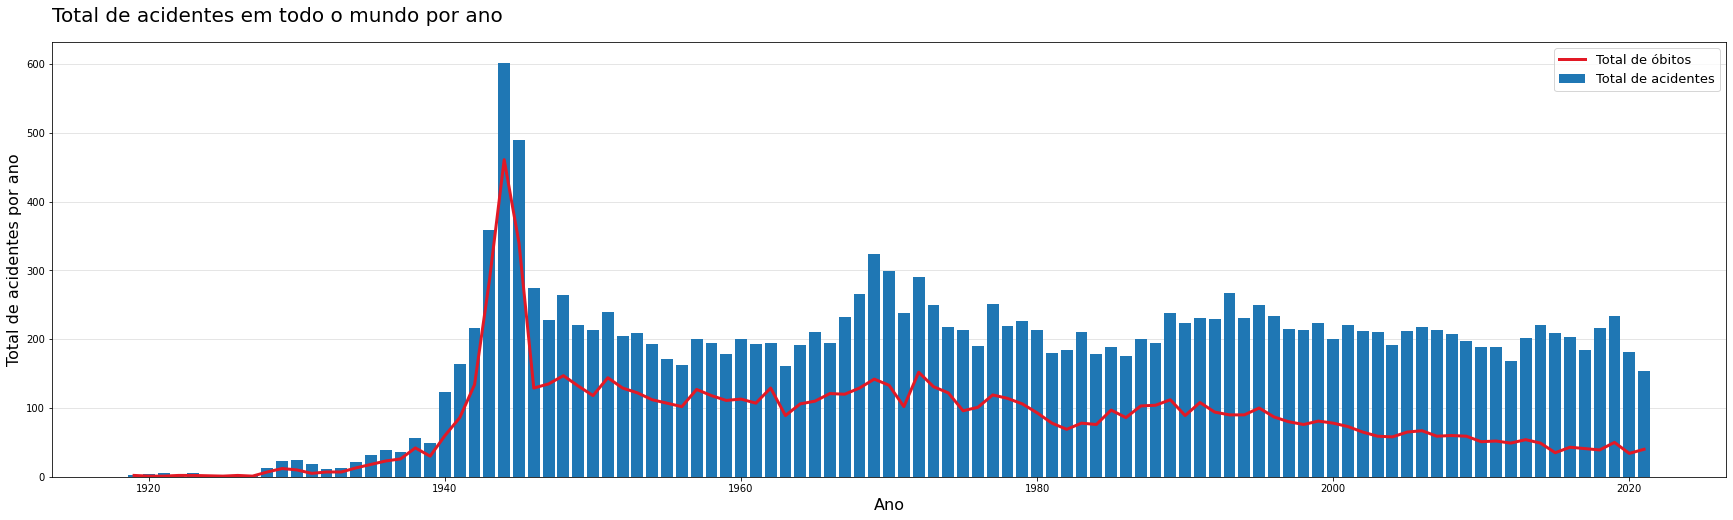

In [35]:
#plt.style.use('fivethirtyeight')
#plt.style.use('')
fig, ax = plt.subplots(figsize=(30,8))

plt.bar(data=df2.Year.value_counts(sort=False), x=df2.Year.unique(), height=df2.Year.value_counts(sort=False).values, width=0.8)
plt.plot(df2[df2.Fatilites > 0].value_counts('Year', sort=False), color='#e21925', linewidth=3)
plt.title('Total de acidentes em todo o mundo por ano', fontsize=20, loc='left', pad=20)
plt.legend(['Total de óbitos', 'Total de acidentes'], fontsize=13)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Total de acidentes por ano', fontsize=16)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.4)
print()
plt.show()

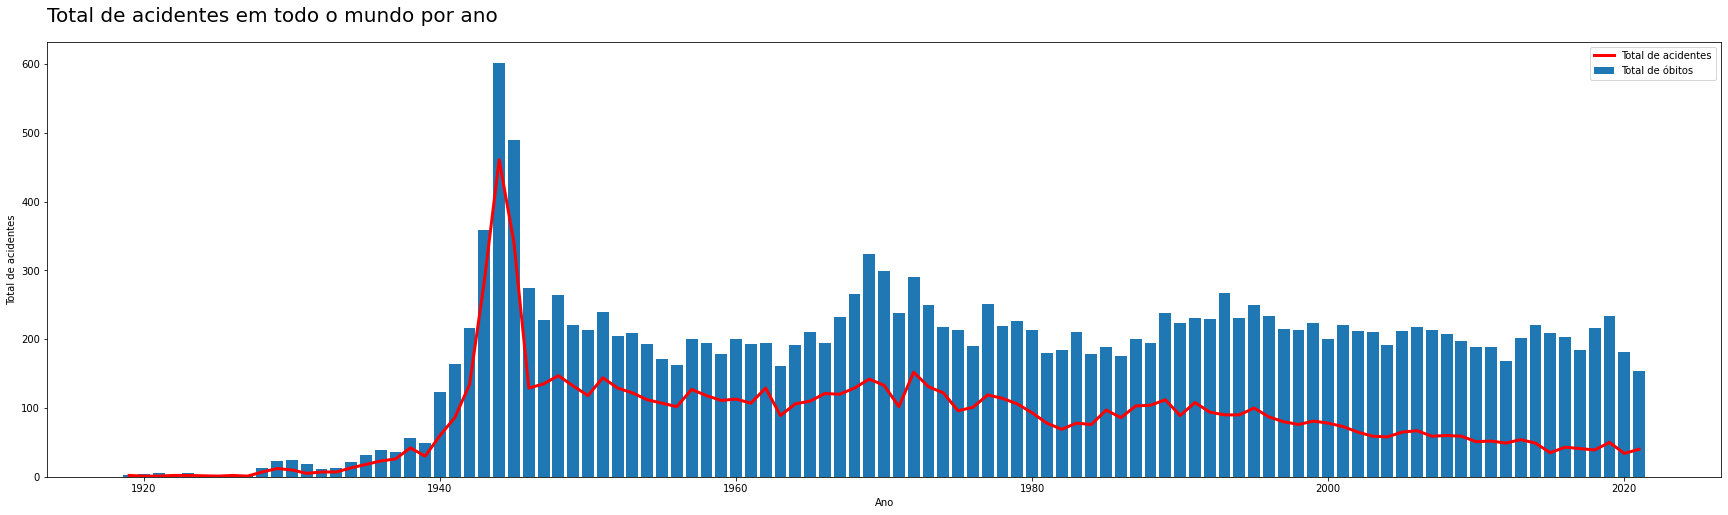

In [36]:
#plt.style.use('fivethirtyeight')
#plt.style.use('default')
fig = plt.subplots(figsize=(30,8))

plt.bar(data=df2.Year.value_counts(sort=False), x=df2.Year.unique(), height=df2.Year.value_counts(sort=False).values, width=0.8)
plt.title('Total de acidentes em todo o mundo por ano', fontsize=20, loc='left', pad=20)
plt.plot(df2[df2.Fatilites > 0].value_counts('Year', sort=False), color='r', linewidth=3)
plt.legend(['Total de acidentes', 'Total de óbitos'])
plt.xlabel('Ano')
plt.ylabel('Total de acidentes')
print()
plt.show()

*Ordenando as linhas pela coluna 'fatilites' de forma decrescente*

In [37]:
df2.sort_values('Fatilites', ascending=False)

,Country,Year,Air_craft_type,Registration_name/mark,Operator,Fatilites,Location,Category
14326,USA,2001,Boeing 767-223ER,N334AA,American Airlines,1692,"New York, NY",H1
14356,USA,2001,Boeing 767-222,N612UA,United Airlines,965,"New York, NY",H1
10867,Japan,1985,Boeing 747SR-46,JA8119,JAL,520,near Ueno Village...,A1
8581,France,1974,DC-10-10,TC-JAV,THY,346,Bois d'Ermen...,A1
13281,India,1996,Boeing 747-168B,HZ-AIH,Saudi Arabian,312,near Charki Dadri,A1
...,...,...,...,...,...,...,...,...
4078,Italy,1953,Fiat G.212,MM61772,Italian AF,0,near Roma-Centoce...,A1
11300,United Kingdom,1987,BN-2A Trislander Mk.III-1,G-OCME,Air West,0,near Liverpool In...,A1
11301,Bolivia,1987,Douglas DC-3-313,CP-1059,TASMI,0,San Ignacio ...,A1
11302,USA,1987,BAe-146-200A,N356PS,PSA,0,Fresno Air T...,A2


*Verificando a quantidade de acidentes que resultaram em: 0(nenhum óbito) até 10 óbitos*

In [38]:
lista = []
for i in range(0, 11):
    a = df2[df2.Fatilites == i]['Fatilites'].count()
    print(f'{i:>2} mortes: {a:>4} acidentes')
    lista.append(a)

print(f'\nTotal: {sum(lista)} acidentes')

 0 mortes: 9932 acidentes
 1 mortes:  996 acidentes
 2 mortes: 1075 acidentes
 3 mortes:  927 acidentes
 4 mortes:  817 acidentes
 5 mortes:  600 acidentes
 6 mortes:  471 acidentes
 7 mortes:  393 acidentes
 8 mortes:  317 acidentes
 9 mortes:  264 acidentes
10 mortes:  213 acidentes

Total: 16005 acidentes


*Criando um dataframe com o número total de óbitos por ano analisado*

In [39]:
dict = {}

for i in range(1919, 2022):
    dict[i] = df2[df2.Year == i]['Fatilites'].sum()

serie = pd.Series(dict)
df_year = pd.DataFrame(serie, columns=['Fatilites'])
df_year

,Fatilites
1919,15
1920,4
1921,2
1922,19
1923,7
...,...
2017,314
2018,953
2019,432
2020,429


*Verificando em quais anos ocorreram mais óbitos*

In [40]:
df_year.sort_values('Fatilites', ascending=False).head()

,Fatilites
2001,3915
1944,3009
1972,2770
1945,2733
1973,2523


*O gráfico a seguir exibe o número de óbitos por ano analisado*

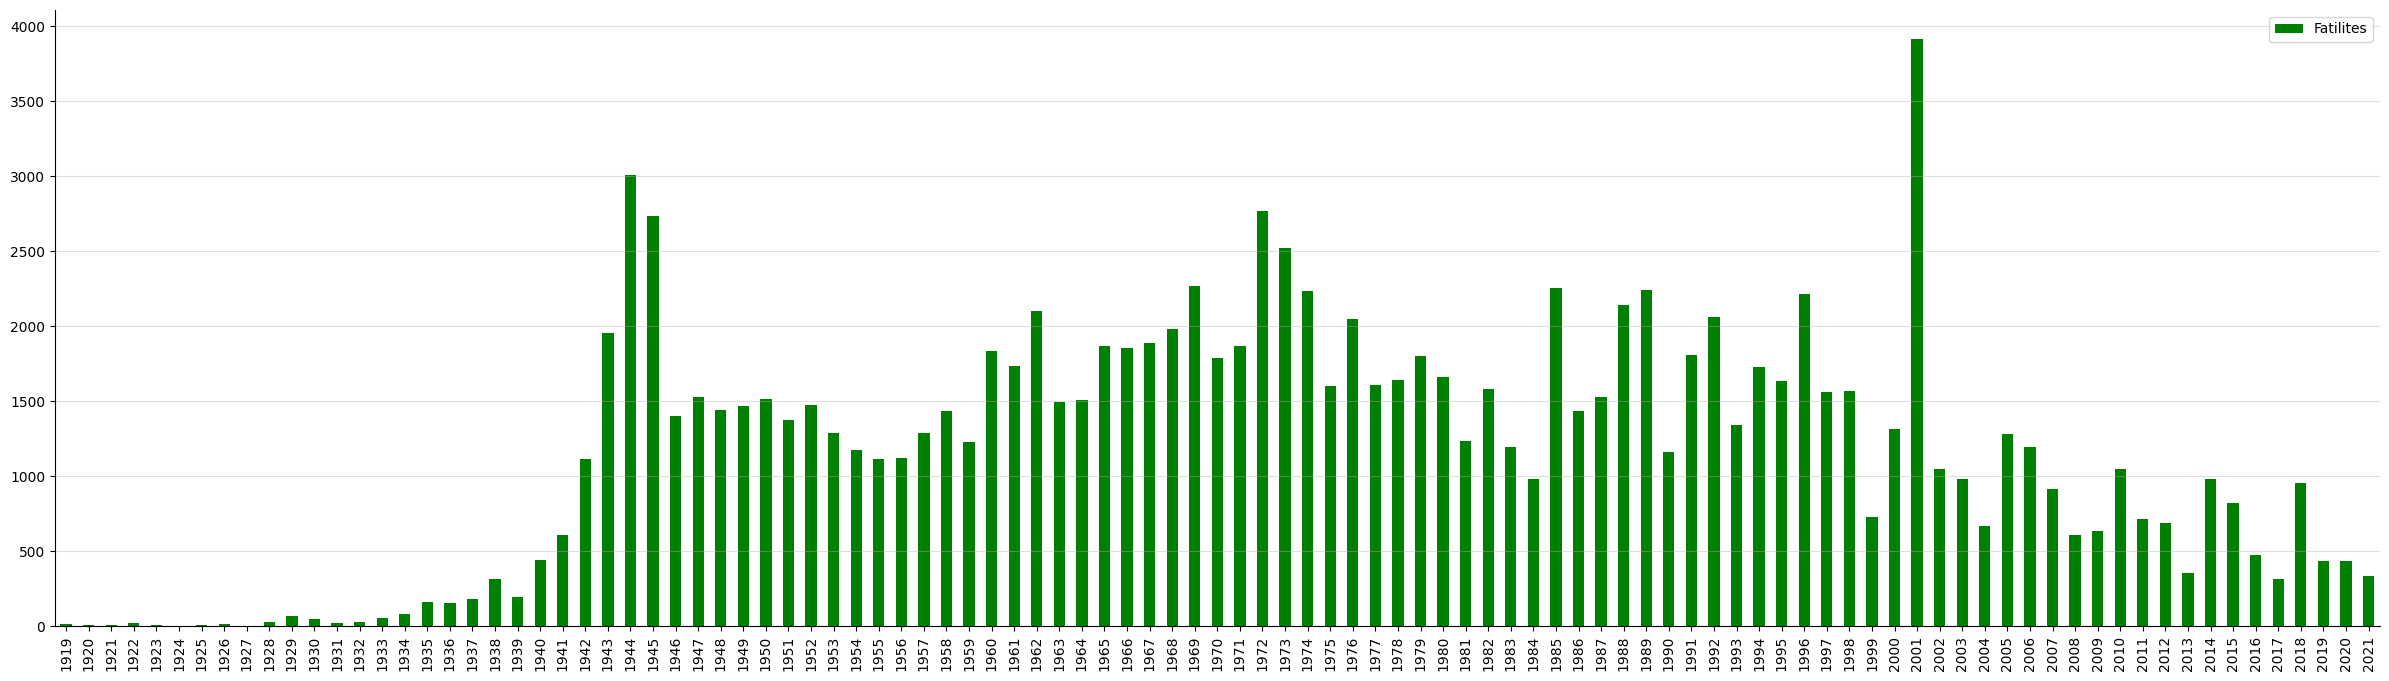

In [41]:
plt.style.use('default')
df_year.plot.bar(figsize=(30,8), color='g').grid(axis='y', alpha=0.4)
sns.despine()
plt.show()

*Criando um dataframe com o número total de óbitos por ano analisado em acidentes ocorridos no Brasil*

In [42]:
dict = {}
for i in range(1919, 2022):
    dict[i] = df2[(df2.Country == 'Brazil')&(df2.Year == i)]['Fatilites'].sum()  

serie_br = pd.Series(dict)
df_br_year = pd.DataFrame(serie_br, columns=['Fatilites'])
df_br_year

,Fatilites
1919,0
1920,0
1921,0
1922,0
1923,0
...,...
2017,1
2018,4
2019,5
2020,0


*Criando um dataframe com o número total de óbitos por ano analisado em acidentes ocorridos na Rússia*

In [43]:
dict1 = {}
for i in range(1919, 2022):
    dict1[i] = df2[(df2.Country == 'Russia')&(df2.Year == i)]['Fatilites'].sum()  

serie_ru = pd.Series(dict1)
df_ru_year = pd.DataFrame(serie_ru, columns=['Fatilites'])
df_ru_year

,Fatilites
1919,0
1920,0
1921,0
1922,0
1923,0
...,...
2017,14
2018,71
2019,45
2020,8


*O gráfico a seguir exibe o número de óbitos por ano analisado em acidentes no Brasil*

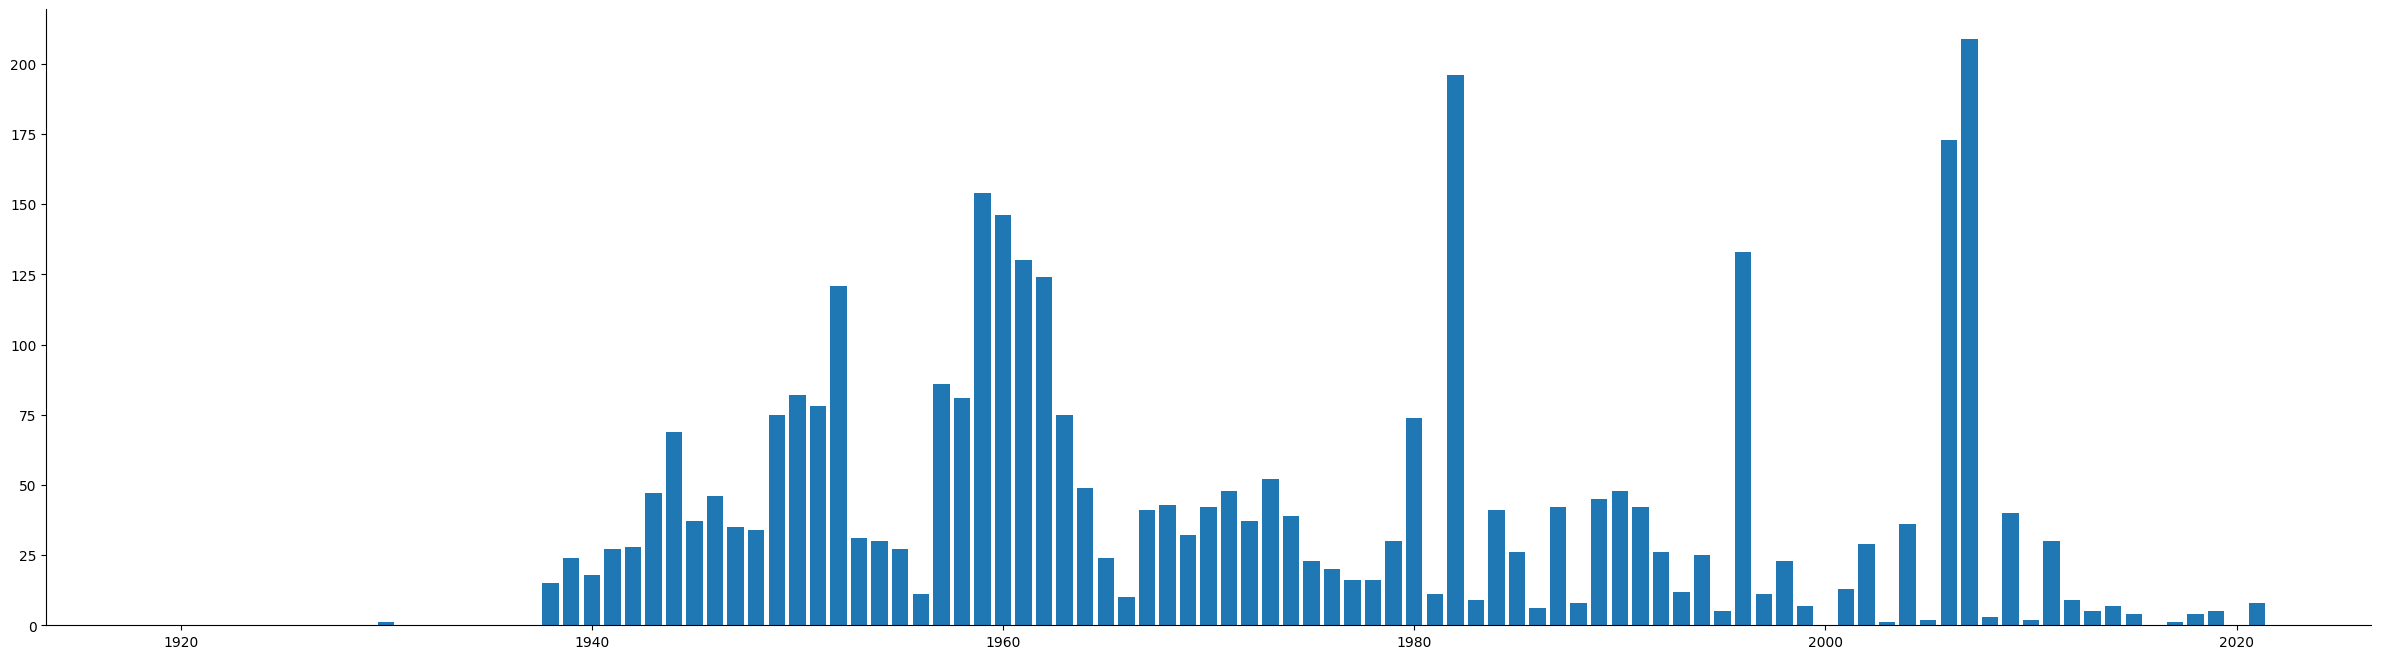

In [44]:
#df_br_year.plot.bar(figsize=(30,8)).grid(axis='y', alpha=0.4)
fig = plt.subplots(figsize=(30,8))
plt.bar(data=df_br_year, height=df_br_year.Fatilites, x=df_br_year.index)
sns.despine()
plt.show()

*O gráfico a seguir exibe o número de óbitos por ano analisado em acidentes na Rússia*

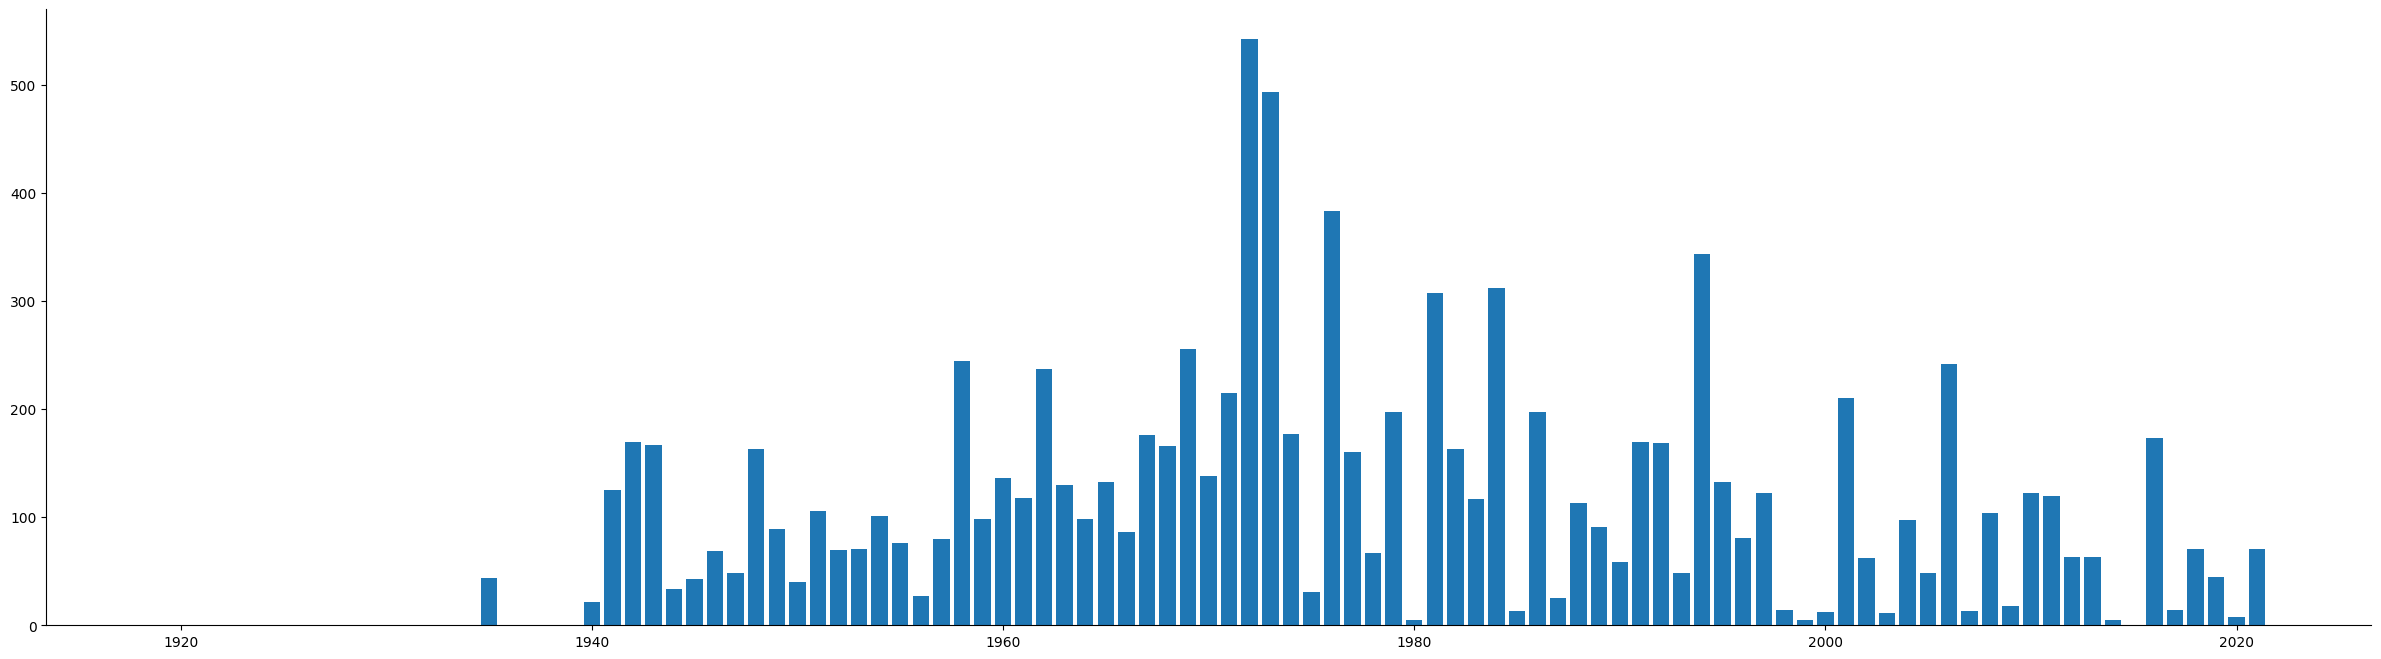

In [45]:
fig = plt.subplots(figsize=(30,8))
plt.bar(data=df_ru_year, height=df_ru_year.Fatilites, x=df_ru_year.index)
sns.despine()
plt.show()

*Descobrindo as médias de óbitos por década, de 1920 a 2020*

In [46]:
print('\033[1mMédia de óbitos por década\033[m\n')
for i in range(1920, 2020, 10):
    print(f'{i} a {i+10}: {round(df_year.loc[i:i+10].values.mean()):>4} óbitos')

#df_year.loc[1980:1990].mean()

Média de óbitos por década

1920 a 1930:   16 óbitos
1930 a 1940:  149 óbitos
1940 a 1950: 1563 óbitos
1950 a 1960: 1348 óbitos
1960 a 1970: 1846 óbitos
1970 a 1980: 1959 óbitos
1980 a 1990: 1582 óbitos
1990 a 2000: 1555 óbitos
2000 a 2010: 1235 óbitos
2010 a 2020:  653 óbitos


In [47]:
br = []
ru = []
print('\n\033[1m      TOTAL DE ÓBITOS POR DÉCADA\033[m')
print('\033[1m-\033[m'*37)
print('\033[1m   Período       Brasil       Rússia\033[m')
print('\033[1m-\033[m'*37)
for i in range(1920, 2020, 10):
    print(f'{i} a {i+10}: {df_br_year.loc[i:i+10].values.sum():>4} óbitos  {df_ru_year.loc[i:i+10].values.sum():>4} óbitos')
    br.append(df_br_year.loc[i:i+10].values.sum())
    ru.append(df_ru_year.loc[i:i+10].values.sum())
print('\033[1m-\033[m'*37)
print(f'\033[1mTOTAL:\033[m       {np.sum(br)} óbitos {np.sum(ru)} óbitos')


      TOTAL DE ÓBITOS POR DÉCADA
-------------------------------------
   Período       Brasil       Rússia
-------------------------------------
1920 a 1930:    1 óbitos     0 óbitos
1930 a 1940:   58 óbitos    66 óbitos
1940 a 1950:  498 óbitos   970 óbitos
1950 a 1960:  847 óbitos  1050 óbitos
1960 a 1970:  716 óbitos  1674 óbitos
1970 a 1980:  397 óbitos  2410 óbitos
1980 a 1990:  506 óbitos  1403 óbitos
1990 a 2000:  332 óbitos  1157 óbitos
2000 a 2010:  508 óbitos   939 óbitos
2010 a 2020:   67 óbitos   684 óbitos
-------------------------------------
TOTAL:       3930 óbitos 10353 óbitos


In [48]:
print('\n\033[1m      MÉDIA DE ÓBITOS POR DÉCADA\033[m')
print('\033[1m-\033[m'*37)
print('\033[1m   Período       Brasil       Rússia\033[m')
print('\033[1m-\033[m'*37)
for i in range(1920, 2020, 10):
    print(f'{i} a {i+10}: {round(df_br_year.loc[i:i+10].values.mean()):>4} óbitos  {round(df_ru_year.loc[i:i+10].values.mean()):>4} óbitos')
print()


      MÉDIA DE ÓBITOS POR DÉCADA
-------------------------------------
   Período       Brasil       Rússia
-------------------------------------
1920 a 1930:    0 óbitos     0 óbitos
1930 a 1940:    5 óbitos     6 óbitos
1940 a 1950:   45 óbitos    88 óbitos
1950 a 1960:   77 óbitos    95 óbitos
1960 a 1970:   65 óbitos   152 óbitos
1970 a 1980:   36 óbitos   219 óbitos
1980 a 1990:   46 óbitos   128 óbitos
1990 a 2000:   30 óbitos   105 óbitos
2000 a 2010:   46 óbitos    85 óbitos
2010 a 2020:    6 óbitos    62 óbitos



*Os gráficos a seguir mostram a quantidade de acidentes com letalidade, por faixa de óbitos. O último gráfico exibe as ocorrências brasileiras.*

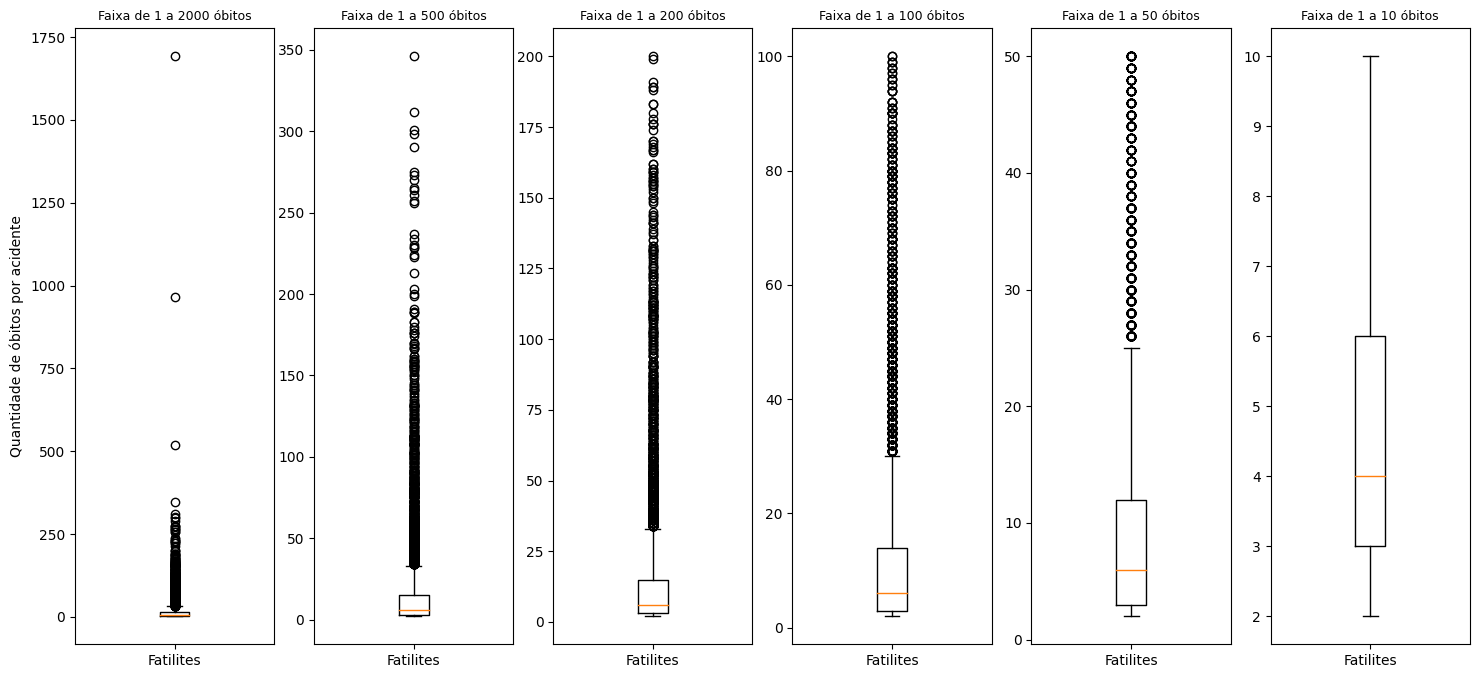

In [49]:
fig, axes = plt.subplots(1, 6, figsize=(18,8))

axes[0].boxplot(df2.Fatilites[df2.Fatilites > 1],labels=['Fatilites'])
axes[0].set_title('Faixa de 1 a 2000 óbitos', fontsize=9)
axes[0].set_ylabel('Quantidade de óbitos por acidente')

axes[1].boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Fatilites < 500)],labels=['Fatilites'])
axes[1].set_title('Faixa de 1 a 500 óbitos', fontsize=9)

axes[2].boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Fatilites <= 200)],labels=['Fatilites'])
axes[2].set_title('Faixa de 1 a 200 óbitos', fontsize=9)

axes[3].boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Fatilites <= 100)],labels=['Fatilites'])
axes[3].set_title('Faixa de 1 a 100 óbitos', fontsize=9)

axes[4].boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Fatilites <= 50)],labels=['Fatilites'])
axes[4].set_title('Faixa de 1 a 50 óbitos', fontsize=9)

axes[5].boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Fatilites <= 10)],labels=['Fatilites'])
axes[5].set_title('Faixa de 1 a 10 óbitos', fontsize=9)

plt.show()

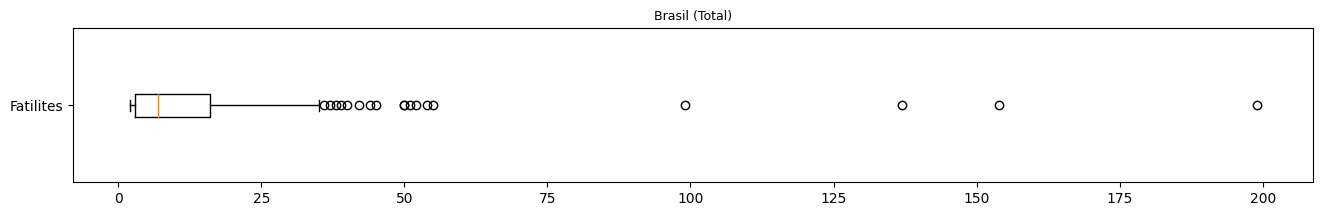

In [50]:
fig, ax = plt.subplots(figsize=(16,2))
ax.boxplot(df2.Fatilites[(df2.Fatilites > 1)&(df2.Country =='Brazil')],labels=['Fatilites'], vert=False)
ax.set_title('Brasil (Total)', fontsize=9)
plt.show()

*Quantidade de acidentes por faixa de óbitos, de 0 a 1700*

In [51]:
lista = [1700, 1600, 1000, 900, 600, 500, 300, 200, 100, 0]

print('\033[1mACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2021\033[m\n')

for i in lista:
    a = df2.Fatilites[(df2.Fatilites <= i+100)&(df2.Fatilites >= i+1)].count()
    b = round(((a / df2.Fatilites.count()) * 100),2)
    if a == 0:
        pass
    else:
        if a == 1:
            print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidente,  percentual: {b:>5}%')
        else:
            print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS SEM MORTESENTRE 1919 E 2021\033[m\n')
print(f' * Sem mortes = {df2.Fatilites[df2.Fatilites == 0].count()} acidentes, percentual: {round(((df2.Fatilites[df2.Fatilites == 0].count() / df2.Fatilites.count()) * 100),2)}%')

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021\033[m\n')
print(f' * Total = {df2.Fatilites.count()} acidentes')

ACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2021

 * Entre 1601 e 1700 =    1 acidente,  percentual:  0.01%
 * Entre  901 e 1000 =    1 acidente,  percentual:  0.01%
 * Entre  501 e  600 =    1 acidente,  percentual:  0.01%
 * Entre  301 e  400 =    3 acidentes, percentual:  0.02%
 * Entre  201 e  300 =   19 acidentes, percentual:   0.1%
 * Entre  101 e  200 =  146 acidentes, percentual:  0.79%
 * Entre    1 e  100 = 8453 acidentes, percentual: 45.55%

ACIDENTES AÉREOS SEM MORTESENTRE 1919 E 2021

 * Sem mortes = 9932 acidentes, percentual: 53.52%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021

 * Total = 18556 acidentes


*Quantidade de acidentes por faixa de óbitos, de 0 a 100*

In [52]:
lista = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
lista2 = []

print('\033[1mACIDENTES AÉREOS COM ATÉ 100 MORTES ENTRE 1919 E 2021\033[m\n')

for i in lista:
    a = df2.Fatilites[(df2.Fatilites <= i+10)&(df2.Fatilites >= i+1)].count()
    lista2.append(a)
    b = round(((a / df2.Fatilites.count()) * 100),2)
    if a == 0:
        pass
    else:
        print(f' * Entre {i+1:>2} e {i+10:>3} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS SEM MORTES ENTRE 1919 E 2021\033[m\n')
print(f' * Sem mortes = {df2.Fatilites[df2.Fatilites == 0].count()} acidentes, percentual: {round(((df2.Fatilites[df2.Fatilites == 0].count() / df2.Fatilites.count()) * 100),2)}%')

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021\033[m\n')
print(f' * Total = {df2.Fatilites.count()} acidentes')

ACIDENTES AÉREOS COM ATÉ 100 MORTES ENTRE 1919 E 2021

 * Entre 91 e 100 =   26 acidentes, percentual:  0.14%
 * Entre 81 e  90 =   47 acidentes, percentual:  0.25%
 * Entre 71 e  80 =   63 acidentes, percentual:  0.34%
 * Entre 61 e  70 =   63 acidentes, percentual:  0.34%
 * Entre 51 e  60 =   99 acidentes, percentual:  0.53%
 * Entre 41 e  50 =  172 acidentes, percentual:  0.93%
 * Entre 31 e  40 =  262 acidentes, percentual:  1.41%
 * Entre 21 e  30 =  529 acidentes, percentual:  2.85%
 * Entre 11 e  20 = 1119 acidentes, percentual:  6.03%
 * Entre  1 e  10 = 6073 acidentes, percentual: 32.73%

ACIDENTES AÉREOS SEM MORTES ENTRE 1919 E 2021

 * Sem mortes = 9932 acidentes, percentual: 53.52%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021

 * Total = 18556 acidentes


*Quantidade de acidentes brasileiros por faixa de óbitos, de 0 a 400*

In [53]:
lista = [300, 200, 100, 0]

print('\033[1mACIDENTES AÉREOS BRASILEIROS COM MORTES ENTRE 1919 E 2021\033[m\n')

for i in lista:
    a = df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites <= i+100)&(df2.Fatilites >= i+1)].count()
    b = round(((a / df2.Fatilites[df2.Country == 'Brazil'].count()) * 100),2)
    if a == 0:
        pass
    else:
        print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2021\033[m\n')
print(f" * Sem mortes = {df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites == 0)].count()} acidentes, percentual: {round(((df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites == 0)].count() / df2.Fatilites[df2.Country == 'Brazil'].count())*100),2)}%")

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021\033[m\n')
print(f' * Total = {df2.Fatilites[df2.Country == "Brazil"].count()} acidentes')

ACIDENTES AÉREOS BRASILEIROS COM MORTES ENTRE 1919 E 2021

 * Entre  101 e  200 =    3 acidentes, percentual:  0.53%
 * Entre    1 e  100 =  291 acidentes, percentual: 51.32%

ACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2021

 * Sem mortes = 273 acidentes, percentual: 48.15%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021

 * Total = 567 acidentes


*Quantidade de acidentes brasileiros por faixa de óbitos, de 0 a 100*

In [54]:
lista = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
lista2 = []

print('\033[1mACIDENTES AÉREOS BRASILEIROS COM ATÉ 100 MORTES ENTRE 1919 E 2021\033[m\n')

for i in lista:
    a = df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites <= i+10)&(df2.Fatilites >= i+1)].count()
    lista2.append(a)
    b = round(((a / df2.Fatilites[df2.Country == 'Brazil'].count()) * 100),2)
    if a == 0:
        pass
    else:
        if a == 1:
            print(f' * Entre {i+1:>3} e {i+10:>3} ={a:>4} acidente,  percentual: {b:>5}%')
        else:
            print(f' * Entre {i+1:>3} e {i+10:>3} ={a:>4} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2021\033[m\n')
print(f" * Sem mortes = {df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites == 0)].count()} acidentes, percentual: {round(((df2.Fatilites[(df2.Country == 'Brazil')&(df2.Fatilites == 0)].count() / df2.Fatilites[df2.Country == 'Brazil'].count())*100),2)}%")

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021\033[m\n')
print(f' * Total = {df2.Fatilites[df2.Country == "Brazil"].count()} acidentes')    

ACIDENTES AÉREOS BRASILEIROS COM ATÉ 100 MORTES ENTRE 1919 E 2021

 * Entre  91 e 100 =   1 acidente,  percentual:  0.18%
 * Entre  51 e  60 =   4 acidentes, percentual:  0.71%
 * Entre  41 e  50 =   5 acidentes, percentual:  0.88%
 * Entre  31 e  40 =   9 acidentes, percentual:  1.59%
 * Entre  21 e  30 =  24 acidentes, percentual:  4.23%
 * Entre  11 e  20 =  50 acidentes, percentual:  8.82%
 * Entre   1 e  10 = 198 acidentes, percentual: 34.92%

ACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2021

 * Sem mortes = 273 acidentes, percentual: 48.15%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2021

 * Total = 567 acidentes


*Criando um dataframe com o número total de acidentes aéreos, acidentes com óbitos, óbitos totais e percentual, por país*

In [55]:
paises = df2['Country'].value_counts().index
acid_totais = df2['Country'].value_counts().to_list()

series = pd.Series(acid_totais, index=paises)
df_3 = pd.DataFrame(series, columns=['Total_de_acidentes'])

# Criando 2 novas colunas, uma contendo o número de acidentes e a outra, a quantidade de óbitos totais, dos 10 recordistas
lista = []
for i in paises:
    a = df2[(df2.Country == i)&(df2.Fatilites>=1)]['Fatilites'].count()
    b = np.sum(df2[df2.Country == i]['Fatilites'])
    lista.append([a, b])
    
df_3[['Acidentes_com_óbitos', 'Total_de_óbitos']] = lista[:]
lista.clear()

# Criando 2 colunas que informam o percentual de acidentes que resultaram ou não em óbitos do valor total de acidentes dos 10 recordistas
tot_mortos = []
tot_vivos = []
for i in paises:
    a=(df_3.loc[i][1] / df_3.loc[i][0])*100
    tot_mortos.append(round((a),2))    
    b = ((df_3.loc[i][0] - df_3.loc[i][1]) / df_3.loc[i][0])*100
    tot_vivos.append(round((b),2))
    
df_3['Óbitos/Total_(%)'] = tot_mortos[:]
df_3['Sem_óbitos/Total_(%)'] = tot_vivos[:]
df_3

,Total_de_acidentes,Acidentes_com_óbitos,Total_de_óbitos,Óbitos/Total_(%),Sem_óbitos/Total_(%)
USA,3876,1727,19269,44.56,55.44
Russia,1284,658,9890,51.25,48.75
Canada,766,269,2351,35.12,64.88
United Kingdom,719,279,2631,38.80,61.20
Brazil,567,294,3525,51.85,48.15
...,...,...,...,...,...
Turks and Caicos Islands,10,3,12,30.00,70.00
Latvia,10,5,55,50.00,50.00
Trinidad and Tobago,9,5,56,55.56,44.44
Mongolia,9,5,118,55.56,44.44


In [56]:
(df_3.loc['USA'].Total_de_acidentes / df_3.Total_de_acidentes.sum())*100

20.88812244018107

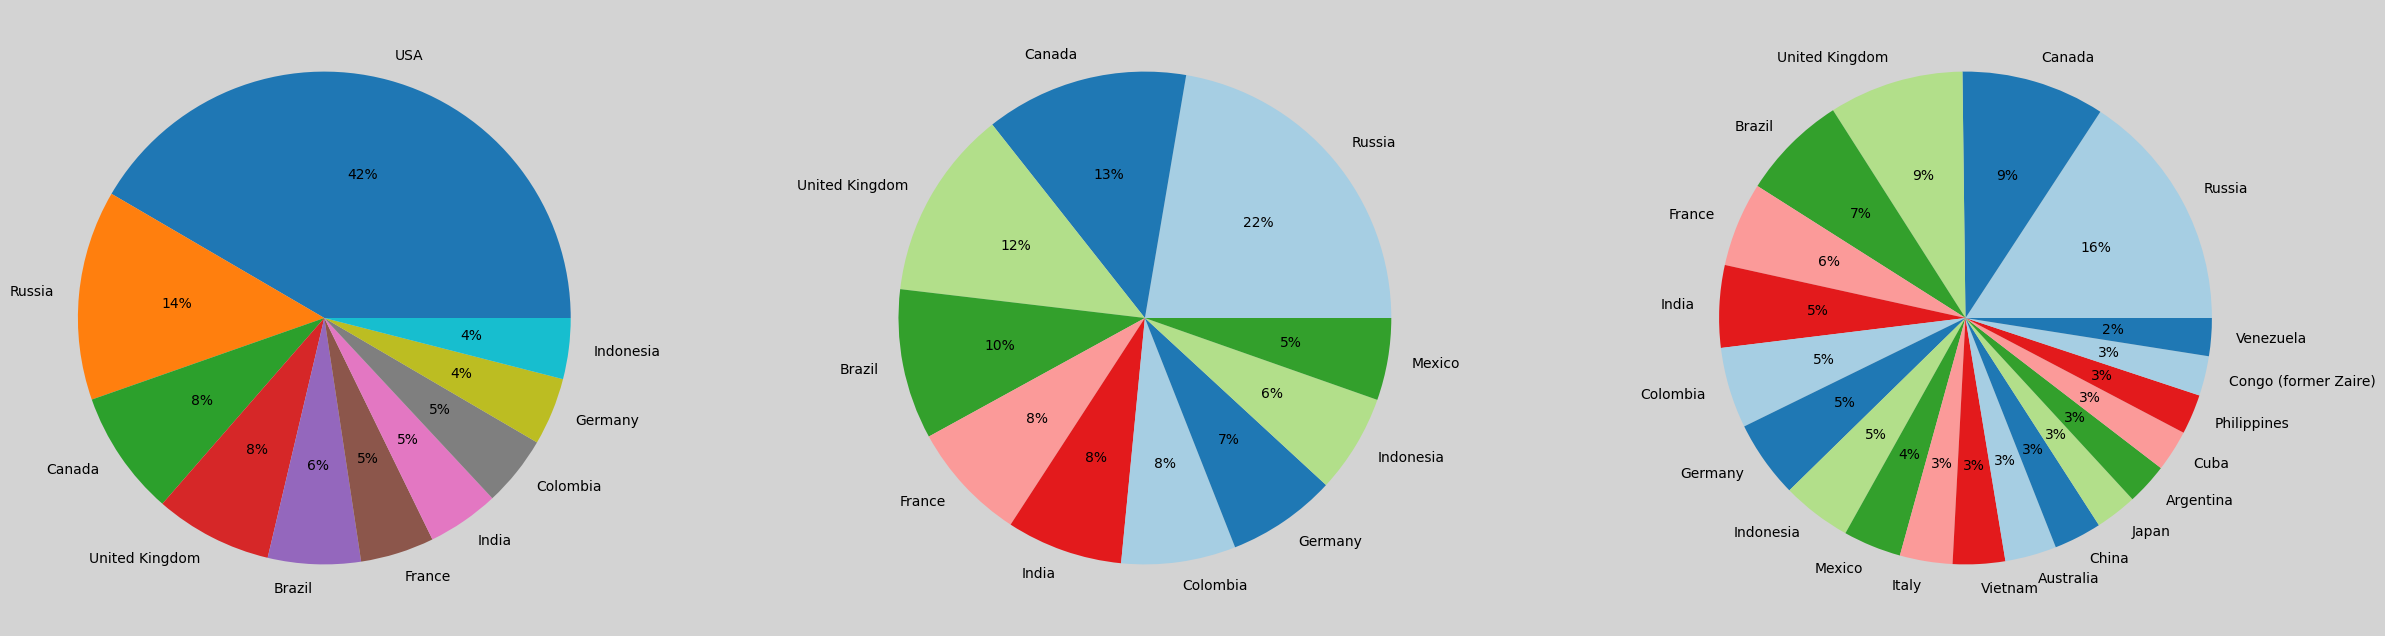

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(30,8), facecolor='lightgrey')

labels = df_3.Total_de_acidentes.head(10).index
labels1 = df_3.Total_de_acidentes[1:].head(10).index
labels2 = df_3.Total_de_acidentes[1:].head(20).index
colors = sns.color_palette('Paired')[0:6]
axes[0].pie(df_3.Total_de_acidentes.head(10), labels=labels, autopct='%.0f%%')
axes[1].pie(df_3.Total_de_acidentes[1:].head(10), labels=labels1, colors=colors, autopct='%.0f%%')
axes[2].pie(df_3.Total_de_acidentes[1:].head(20), labels=labels2, colors=colors, autopct='%.0f%%')

plt.show()

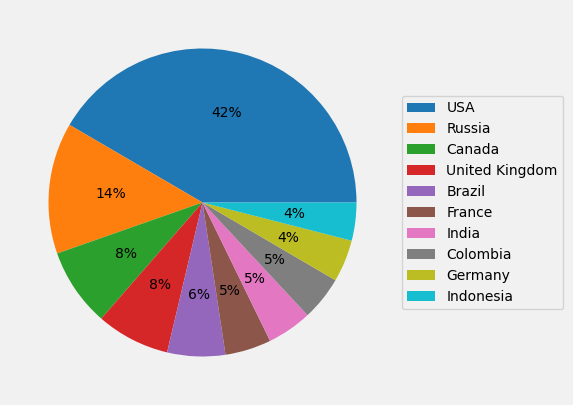

In [58]:
fig, axes = plt.subplots(figsize=(30,5), facecolor='#f1f1f1')

labels = df_3.Total_de_acidentes.head(10).index
colors = sns.color_palette('Paired')[0:6]
axes.pie(df_3.Total_de_acidentes.head(10), autopct='%.0f%%',)
axes.legend(labels=labels, facecolor='#f1f1f1', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

*Gráfico exibe o total de acidentes dos 10 recordistas e quantos destes acidentes tiveram óbitos*

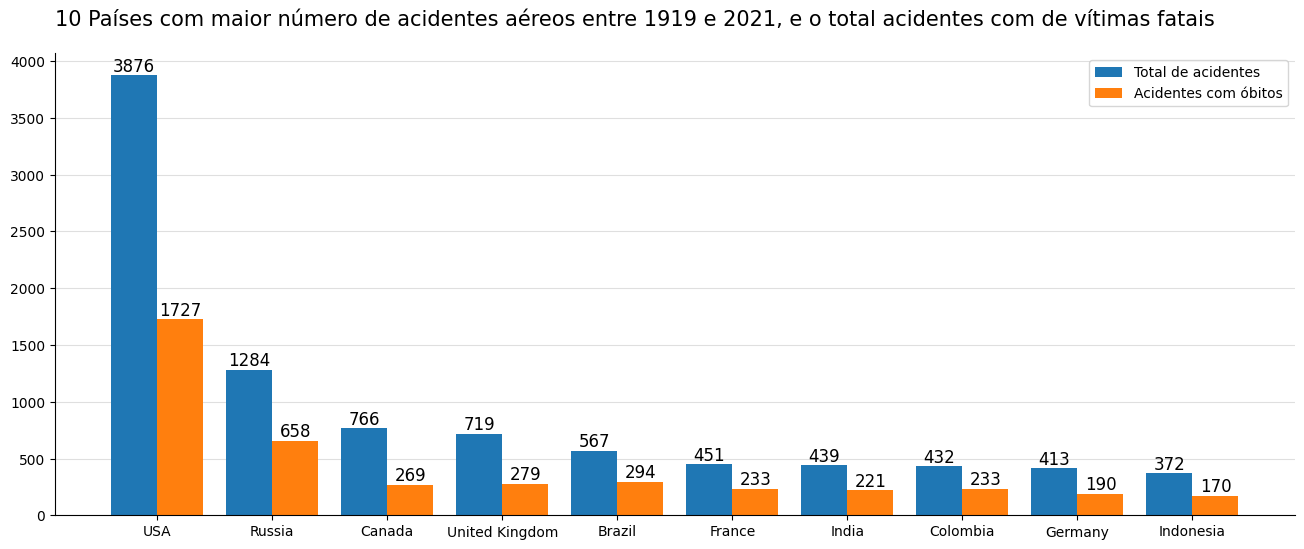

In [66]:
fig, ax = plt.subplots(figsize=(16,6),
                       #facecolor='#f1f1f1'
                      )

p1 = ax.bar(data=df_3.Total_de_acidentes.head(10), x=df_3.head(10).index, height=df_3.Total_de_acidentes.head(10).values, width=-0.4, align='edge')
p2 = ax.bar(data=df_3.Acidentes_com_óbitos.head(10), x=df_3.head(10).index, height=df_3.Acidentes_com_óbitos.head(10).values, width=0.4, align='edge')

ax.bar_label(p1, label_type='edge', fontsize=12)
ax.bar_label(p2, label_type='edge', fontsize=12)
ax.legend(['Total de acidentes','Acidentes com óbitos'], loc='upper right', fontsize=10)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.4)
#ax.set_facecolor('lightgrey')
ax.set_title('10 Países com maior número de acidentes aéreos entre 1919 e 2021, e o total acidentes com de vítimas fatais', fontsize=15, loc='left', pad=20)
sns.despine()
print()
plt.savefig('001.png', format='png', facecolor='w', dpi=120)
plt.show()

In [60]:
# Verificando os quais são os 20 recordistas em acidentes aéreos
df_3.head(20).index

Index(['USA', 'Russia', 'Canada', 'United Kingdom', 'Brazil', 'France',
       'India', 'Colombia', 'Germany', 'Indonesia', 'Mexico', 'Italy',
       'Vietnam', 'Australia', 'China', 'Japan', 'Argentina', 'Cuba',
       'Philippines', 'Congo (former Zaire)'],
      dtype='object')

In [61]:
# Modificando o nome do 20º recordista
df_3.index.values[19] = 'Congo'
df_3.index[19]

'Congo'

In [116]:
a = 'United Arab Emirates'
a.split(' ')

['United', 'Arab', 'Emirates']

In [118]:
#for i in dict_215_usa.keys():
#    print(i)

In [119]:
from country_dict_code import dict_215_usa

count = 0
for i in df_3.index:
    if i in dict_215_usa.keys():
        #print(i)
        count = count + 1
        
count

136

*Gráfico exibe o total de acidentes dos 20 recordistas e quantos destes acidentes tiveram óbitos*

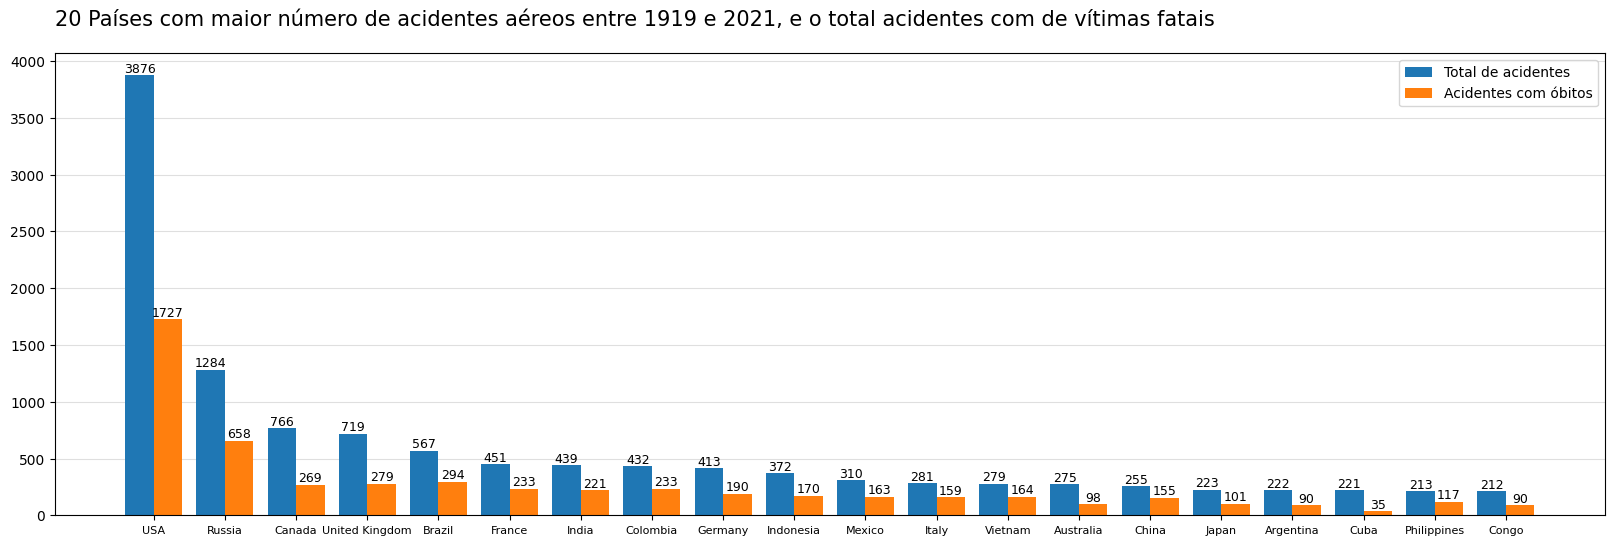

In [62]:
fig, ax = plt.subplots(figsize=(20,6))

p1 = ax.bar(data=df_3.Total_de_acidentes.head(20), x=df_3.head(20).index, height=df_3.Total_de_acidentes.head(20).values, width=-0.4, align='edge')
p2 = ax.bar(data=df_3.Acidentes_com_óbitos.head(20), x=df_3.head(20).index, height=df_3.Acidentes_com_óbitos.head(20).values, width=0.4, align='edge')

ax.bar_label(p1, label_type='edge', fontsize=9)
ax.bar_label(p2, label_type='edge', fontsize=9)
plt.xticks(fontsize=8)
ax.legend(['Total de acidentes','Acidentes com óbitos'], loc='upper right', fontsize=10)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.4)
ax.set_title('20 Países com maior número de acidentes aéreos entre 1919 e 2021, e o total acidentes com de vítimas fatais', fontsize=15, loc='left', pad=20)
#sns.despine()
#ax.axis["right"].set_visible(False)
#ax.axis["top"].set_visible(False)
print()
plt.show()

In [63]:
df_3.Total_de_acidentes.sum()

18556

In [64]:
#df = px.data.tips()
#fig = px.icicle(df, path=[px.Constant("all"), 'sex', 'day', 'time'],values='total_bill', color='day')
#fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
f#ig.show()

NameError: name 'f' is not defined

In [ ]:
#df_icicle = px.icicle(df_3, df_3.index, df_3.Total_de_acidentes)
#df_icicle.show()

*Criando um dataframe com o total de óbitos por ano e país*

In [ ]:
anos = df2.Year.unique()
lista = []
dict = {}
for n in df2.Country.unique():
    for i in df2.Year.unique():
        a = np.sum(df2[(df2.Country == n)&(df2.Year == i)]['Fatilites'])
        lista.append(a)
    dict[n] = lista[:]
    lista.clear()

df_pais_ano = pd.DataFrame(dict, index=df2.Year.unique())
df_pais_ano

In [ ]:
df_pais_ano.loc[1970:1978, 'Russia']

In [ ]:
df_pais_ano.T.max()

In [ ]:
df_pais_ano.Russia.sort_values(ascending=False)

In [ ]:
df_pais_ano.loc[1973].sort_values(ascending=False)

*Verificando os paises recordistas de mortes por ano*

In [ ]:
df_pais_ano.max().sort_values(ascending=False).head(10)

*Criando um dataframe com o país que teve o maior número de óbitos por ano e a quantidade de óbitos*

In [ ]:
lista = []
for i in df_pais_ano.index:
    a = df_pais_ano[df_pais_ano.index == i].max().sort_values(ascending=False).head(1).index[0]
    b = df_pais_ano[df_pais_ano.index == i].max().sort_values(ascending=False).head(1)[0]
    lista.append([i, a, b])
    
#lista
df_pais_ano_tot = pd.DataFrame(lista, columns=['year', 'country', 'fatilites'])
df_pais_ano_tot

#df_pais_ano[df_pais_ano.index == 1955].max().sort_values(ascending=False).head(1).index[0]

In [ ]:
# modificando o valor
df_pais_ano_tot.loc[5] = df_pais_ano_tot.loc[5].replace('Italy', 'None')
df_pais_ano_tot.head(10)

*Verificando quantas vezes cada país foi recordista em óbitos por ano*

In [ ]:
df_pais_ano_tot.country.value_counts()

In [ ]:
df_pais_ano_tot.fatilites.plot(kind='bar', figsize=(30,8))

In [ ]:
df_pais_ano[['Russia','Brazil','India']].plot(kind='density', figsize=(18,8))
plt.show()

In [ ]:
df_pais_ano[['Russia','Brazil','India']][df_pais_ano[['Russia','Brazil','India']]>=1].count()

In [ ]:
df_pais_ano[['Russia','Brazil','India']].sum()